In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

## **Data Exploration & Preprocessing**

In [2]:
# Load the fashion_mnist dataset directly into training and testing dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to ensure a consistent scaling of pixel
X_train = X_train / 255.0
X_test = X_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Count the samples in each class in the training dataset
class_counts = {}
for label in y_train:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

print('Class Counts:')
for label, count in class_counts.items():
    print(f'Class {label}: {count} images')

Class Counts:
Class 9: 6000 images
Class 0: 6000 images
Class 3: 6000 images
Class 2: 6000 images
Class 7: 6000 images
Class 5: 6000 images
Class 1: 6000 images
Class 6: 6000 images
Class 4: 6000 images
Class 8: 6000 images


## **Model Training**

In [ ]:
''' Use the Sequencial model for basic neural networks where each layers are
linear stack, which means, output of one layer is the input of the next layer. '''
model = Sequential()
''' Adds a Flatter layer, where image is 28x28 and transforms it into a
one-dimensional array as the next leyer required a one-dimensional input.
It is the input of the model. '''
model.add(Flatten(input_shape=(28, 28)))
''' Adds a Dense layer, where there are 128 neurons and uses ReLU
(Rectified Linear Unit) activation function, in which introduces non-linearity
to the model, allowing it to learn complex patterns. '''
model.add(Dense(128, activation='relu'))
''' Add Dense layer, where there are 10 neurons representing each dataset class
and uses softmax activation function, in which converts the raw output of the
neurons into probabilities, ensuring that the sum of probabilities for all
classes equals 1. This is commonly used for multi-class classification problems.
It is the output of the model. '''
model.add(Dense(10, activation='softmax'))

''' Setup the model training process by specifying how the model will learn
(optimizer), what it aims to minimize (loss function), and how its performance
will be evaluated (metrics). 'adam' adapts the learning rate for each parameter
individually, which can speed up convergence and improve performance.
'sparse_categorical_crossentropy' is suitable for multi-class classification
problems where it calculates the cross-entropy loss between the predicted
probabilities and the true class labels. 'accuracy' measures the percentage of
correct predictions. '''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Train a model with 5 epochs
history_5 = model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=0)

In [6]:
# Train a model with 10 epochs
history_20 = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)

In [7]:
# Train a model with 50 epochs
history_50 = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

In [8]:
# Train a model with 50 epochs
history_50_v2 = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

In [14]:
# Train a model with 50 epochs
history_50_v3 = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

In [9]:
# Train a model with 100 epochs
history_100 = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

In [10]:
# Train a model with 100 epochs that will stop if there are no improvement within 5 epochs
history_100_s5 = model.fit(X_train,
                        y_train,
                        epochs=100,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=EarlyStopping(patience=5))

In [11]:
# Train a model with 100 epochs that will stop if there are no improvement within 10 epochs
history_100_s10 = model.fit(X_train,
                        y_train,
                        epochs=100,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=EarlyStopping(patience=10))

In [12]:
# Train a model with 100 epochs that will stop if there are no improvement within 15 epochs
history_100_s15 = model.fit(X_train,
                        y_train,
                        epochs=100,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=EarlyStopping(patience=15))

In [13]:
# Train a model with 100 epochs that will stop if there are no improvement within 20 epochs
history_100_s20 = model.fit(X_train,
                        y_train,
                        epochs=100,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=EarlyStopping(patience=20))

In [29]:
# Train a model with 100 epochs that will stop if there are no improvement within 30 epochs
history_100_s30 = model.fit(X_train,
                        y_train,
                        epochs=100,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=EarlyStopping(patience=30))

## **Model Visualization**

In [31]:
# A function that plot the model loss over the number of epoch during training
def plot_history(history, title):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# A function to plot the model loss over the number of epoch during training in the same chart
def plot_histories(histories, title, labels):
    plt.figure(figsize=(12, 6))

    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} Train')
        plt.plot(history.history['val_loss'], label=f'{label} Validation', linestyle='--')

    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

#### **Standard Training**

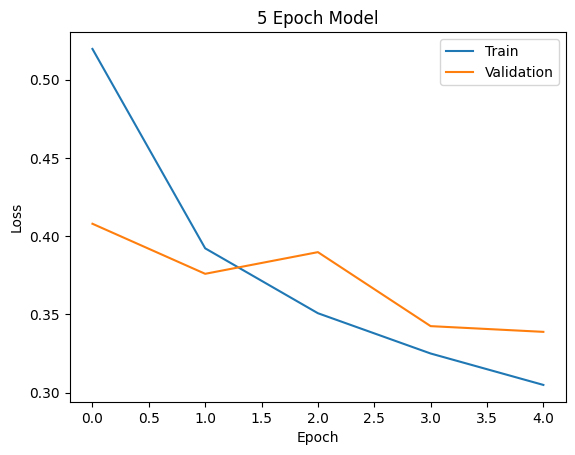

In [16]:
plot_history(history_5, '5 Epoch Model')

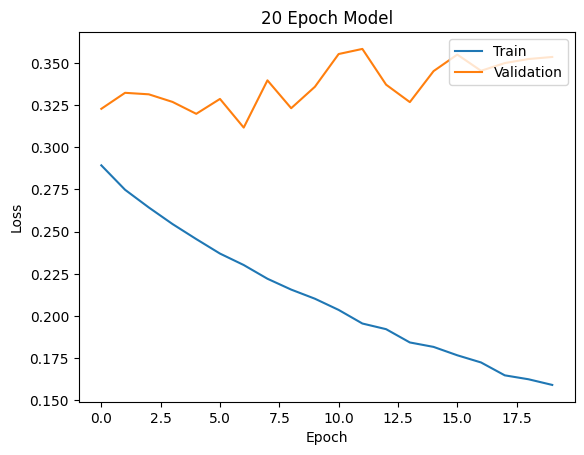

In [17]:
plot_history(history_20, '20 Epoch Model')

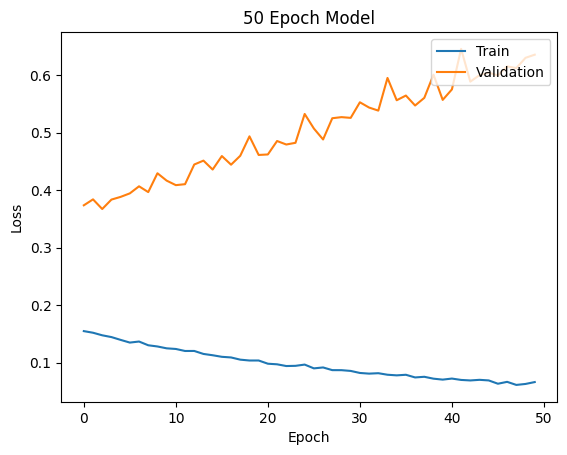

In [18]:
plot_history(history_50, '50 Epoch Model')

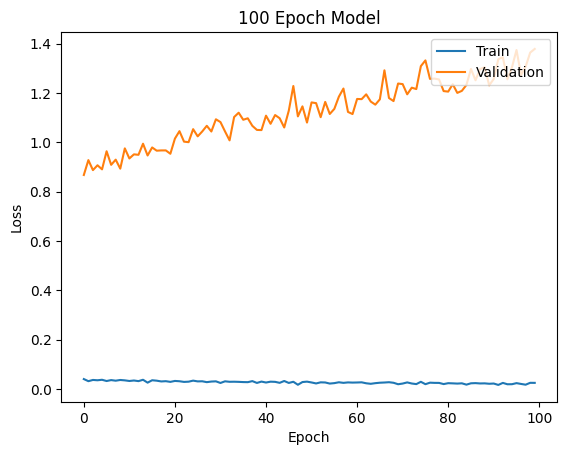

In [19]:
plot_history(history_100, '100 Epoch Model')

#### **Different Training Iteration**

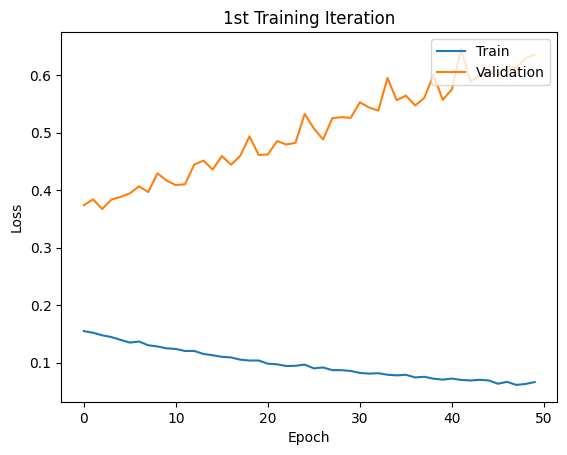

In [20]:
plot_history(history_50, '1st Training Iteration')

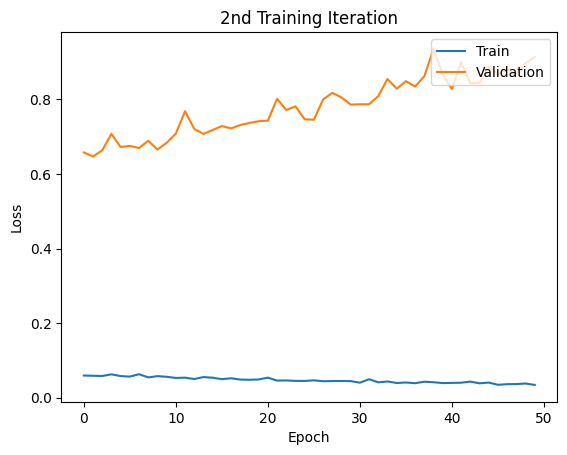

In [21]:
plot_history(history_50_v2, '2nd Training Iteration')

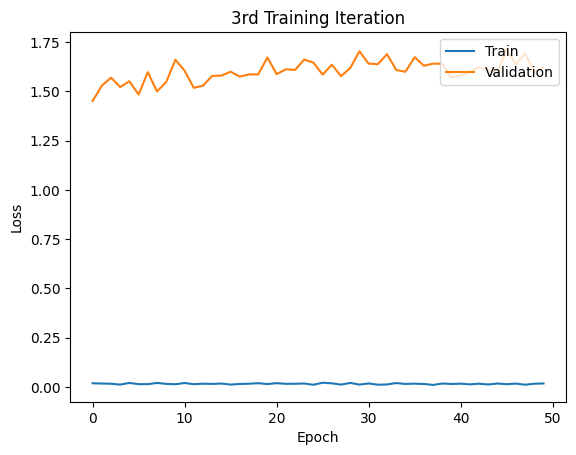

In [22]:
plot_history(history_50_v3, '3rd Training Iteration')

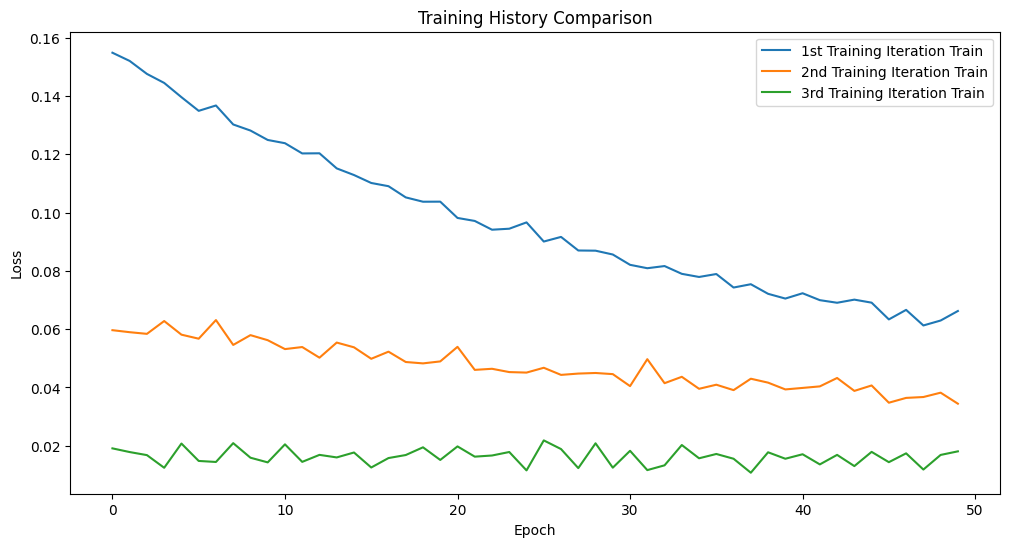

In [32]:
# Plot the training history at the same chart
histories = [history_50, history_50_v2, history_50_v3]
labels = ['1st Training Iteration',
          '2nd Training Iteration',
          '3rd Training Iteration']
plot_histories(histories, 'Training History Comparison', labels)

#### **Training with Early Stopping**

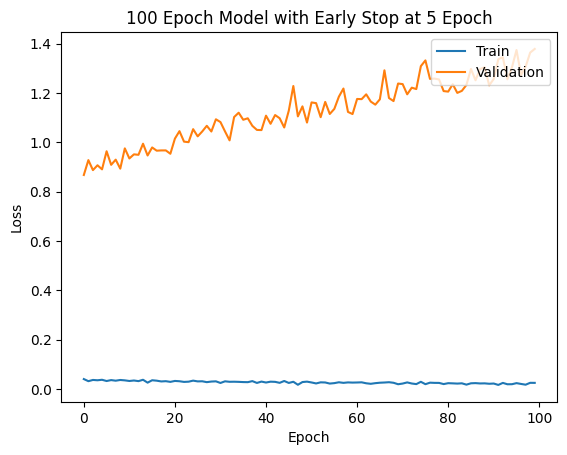

In [24]:
plot_history(history_100, '100 Epoch Model with Early Stop at 5 Epoch')

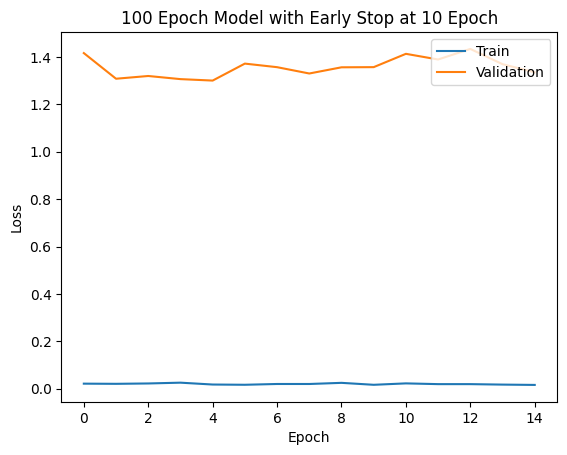

In [25]:
plot_history(history_100_s10, '100 Epoch Model with Early Stop at 10 Epoch')

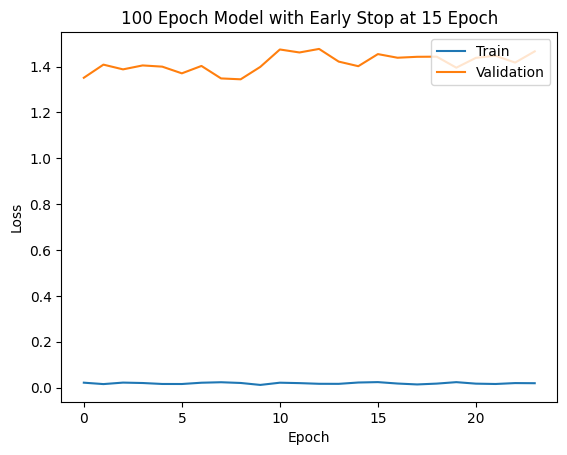

In [26]:
plot_history(history_100_s15, '100 Epoch Model with Early Stop at 15 Epoch')

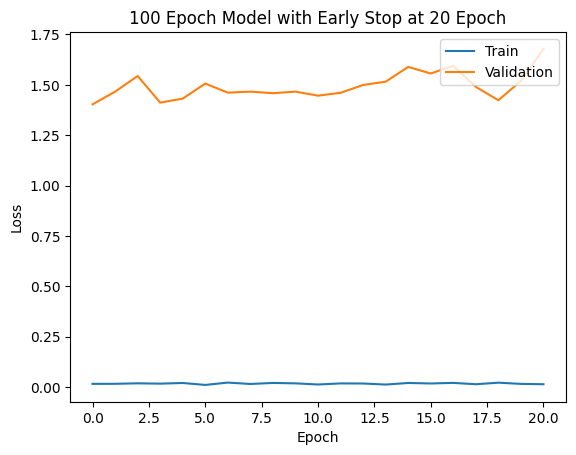

In [27]:
plot_history(history_100_s20, '100 Epoch Model with Early Stop at 20 Epoch')

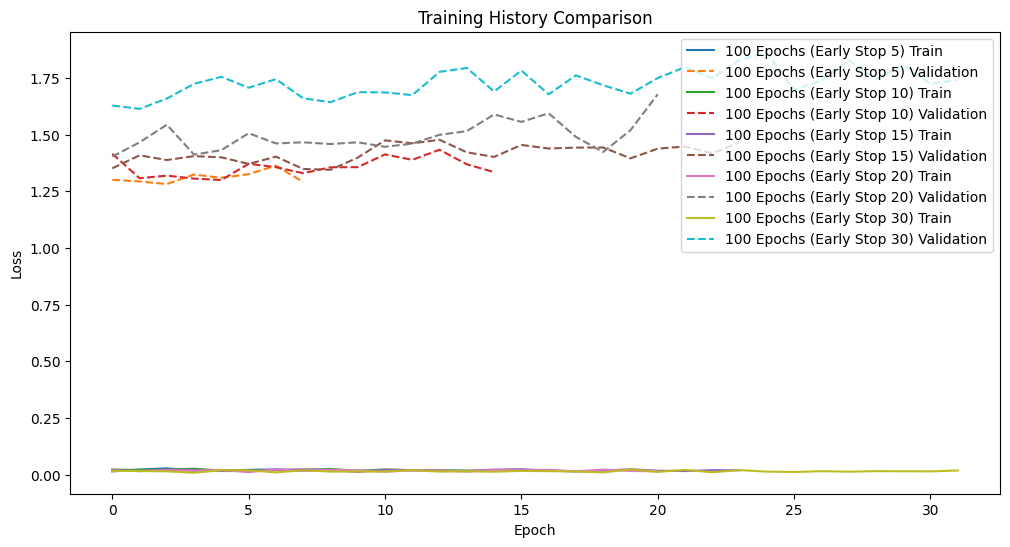

In [30]:
# Plot the training history at the same chart
histories = [history_100_s5, history_100_s10, history_100_s15, history_100_s20, history_100_s30]
labels = ['100 Epochs (Early Stop 5)',
          '100 Epochs (Early Stop 10)',
          '100 Epochs (Early Stop 15)',
          '100 Epochs (Early Stop 20)',
          '100 Epochs (Early Stop 30)']
plot_histories(histories, 'Training History Comparison', labels)